<a href="https://colab.research.google.com/github/Dichik/y03t02-ai-in-image-processing/blob/main/assignment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## Basics of object detection using OpenCV

### Мета
Навчитись виявляти обличчя та пішоходів в режимі реального часу за допомогою OpenCV

## Task

1. Використовуючи будь-яку фотографію з декількома людьми, виявити на ньому обличчя, очi, усмiшку. Порахувати кiлькiсть осiб на фото;
2. Зробити розпізнавання використовуючи будь-яке відео з обличчям людини, тривалiстю не менше 30 секунд. Можно використати камеру ноутбука;
3. Обробити вiдеофал, так щоб вiн видiляв пiшоходiв i, по можливостi, їхнi обличчя. Файл можна взяти з youtube i вирiзати ролик тривалiстю не менше 30 секунд.


### Imports

In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
print(cv2.__version__)

4.6.0


In [24]:
class Config:
  scaling_factor = 0.5

In [19]:
# defined constants for the assignment
image_path = '/content/people.jpeg'

### Face detection on the picture.

In [ ]:
# TODO research Алгоритм Віоли-Джонса

In [25]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # What does it mean? research it deeper
frame = cv2.imread(image_path)
frame = cv2.resize(frame, None, fx=Config.scaling_factor, fy=Config.scaling_factor, interpolation=cv2.INTER_AREA)
face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5) # RESEARCH what exatctly is going on here


Found 14 faces!


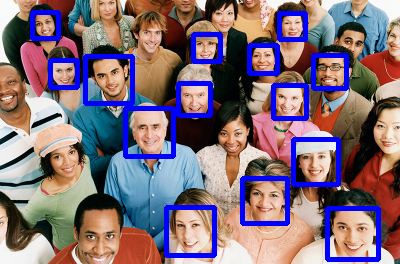

In [26]:
print(f"Found {len(face_rects)} faces!")
for (x, y, w, h) in face_rects:
  cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)
cv2_imshow(frame)

## Detection of face, smile, eyes

Found 1 faces!
Found 0 smiles!
Found 0 eyes!


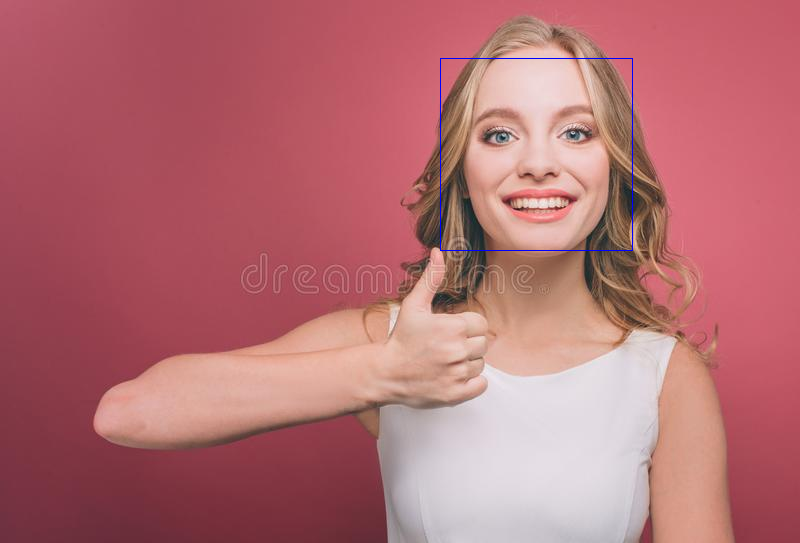

In [46]:
person_image_path = '/content/smile.jpeg'

img = cv2.imread(person_image_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray_filter = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_rects = face_cascade.detectMultiScale(gray_filter, 1.1, 5) # TODO research parameters
print(f"Found {len(face_rects)} faces!")
for (x, y, w, h) in face_rects:
  cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
  face_grey = gray_filter[x:x + w, y:y + h] # RESEARCH why do we have grey here?
  face_color = img[x:x + w, y:y + h]
  smile = smile_cascade.detectMultiScale(face_grey, 1.9, 10)
  print(f"Found {len(smile)} smiles!")
  eye = eye_cascade.detectMultiScale(face_grey)
  print(f"Found {len(eye)} eyes!")

  for (sx, sy, sw, sh) in smile:
    cv2.rectangle(face_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 1)
  for (ex, ey, ew, eh) in eye: 
    cv2.rectangle(face_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 1)

cv2_imshow(img)

## Final Questions

1. Що таке алгоритм Віоли-Джонсона? 
2. Що таке haarcascade?
3. Що таке HOG-класифікатор?
4. Що таке SVM-детектор?
5. Що робить метод cvtColor та яка його мета використання у цій лабораторній?